In [28]:
__author__ = 'Security'
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt


In [29]:
N = 1000
theta = 0.5
K = 500
#Здесь и далее sigma = 2.1 (в литературе равное sigma^2)

# 1. Для биномиального распределения: p(x) = c x^0 I(0.067 < x < 0.98), число с посчитайте из условия нормировки
# 2. Для нормального распределения с неизвестным математическим ожиданием: нормальное с параметрами 9 и 0.32
# 3. Для нормального распределения с неизвестной дисперсией: p(x) = c x^5 I(0.16 < x < 0.88), число с посчитайте из условия нормировки

In [30]:
class generator(stats.rv_continuous):
    def _pdf(self, x):
        return 6 * x ** 5 / 0.4643873096

def getParamForBin():
    return stats.uniform.rvs(loc=0.067, scale=(0.98-0.067), size=1)[0]

def getFisherInfoForBin(n, m, p):
    return p * (1-p) / (n * m)

def getFisherInfoForExp(a, n):
    return a * a / n
def getFisherInfoForNormal(sigma, n):
    return sigma / n

def getExpectation():
    return np.random.normal(9, np.sqrt(0.32), size=1)[0]

def getDispersion():
    disp = generator(a=0.16, b=0.88, name='dispersion')
    return disp.rvs(size=1)[0]

binTheta = getParamForBin()
expectationTheta = getExpectation()
dispersionTheta = getDispersion()


# условие не согласуется с данными в файле, поэтому считаю, что данное распределения для нормального с неизвестной дисперсией относится к экспоненциальному
samples = [stats.binom.rvs(n=50, p=binTheta, size=N), stats.expon.rvs(scale=dispersionTheta, size=N), np.random.normal(expectationTheta, np.sqrt(2.1), size=N)]

def getEffectiveEstimationForBin(sample, m):
    return np.array(sample).mean() / m


def getEffectiveEstimationForExp(sample):
    return np.array(sample).mean()


def getEffectiveEstimationForNormal(sample):
    return np.array(sample).mean()

def binEstimation2(sample, m):
    return sample[0]/m

def expEstimation2(sample):
    return 1/(2 * np.array(sample).mean()) + len(sample) / (2 * np.min(sample))
def normEstimation2(sample):
    return np.median(sample)


binEffectiveEst = [getEffectiveEstimationForBin(samples[0][:n], 50) for n in range(1, N)]
expEffecitiveEst = [getEffectiveEstimationForExp(samples[0][:n]) for n in range(1, N)]
normEffectiveEst = [getEffectiveEstimationForNormal(samples[0][:n]) for n in range(1, N)]

binEffectiveEst2 = [binEstimation2(samples[0][:n], 50) for n in range(1, N)]
expEffecitiveEst2 = [expEstimation2(samples[0][:n]) for n in range(1, N)]
normEffectiveEst2 = [normEstimation2(samples[0][:n]) for n in range(1, N)]



def getS2(sample):
    return np.average(np.array(sample) ** 2) - (np.average(sample) ** 2)


def getDispersionBootstrapEstimationForBin(n):
    return getS2([getEffectiveEstimationForBin(stats.binom.rvs(n=50, p=binEffectiveEst[n], size=n), 50) for _ in range(1, K)])

def getDispersionBooststrapEstimationForExp(n):
    return getS2([getEffectiveEstimationForExp(stats.expon.rvs(scale=expEffecitiveEst[n], size=n)) for _ in range(1, K)])

def getDispersionBoostsrapEstimationForNormal(n):
    return getS2([getEffectiveEstimationForExp(np.random.normal(normEffectiveEst[n], np.sqrt(2.1), size=n)) for _ in range(1, K)])

def getDispersionBootstrapEstimationForBin2(n):
    return getS2([getEffectiveEstimationForBin(stats.binom.rvs(n=50, p=binEffectiveEst2[n], size=n), 50) for _ in range(1, K)])

def getDispersionBooststrapEstimationForExp2(n):
    return getS2([getEffectiveEstimationForExp(stats.expon.rvs(scale=expEffecitiveEst2[n], size=n)) for _ in range(1, K)])

def getDispersionBoostsrapEstimationForNormal2(n):
    return getS2([getEffectiveEstimationForExp(np.random.normal(normEffectiveEst2[n], np.sqrt(2.1), size=n)) for _ in range(1, K)])


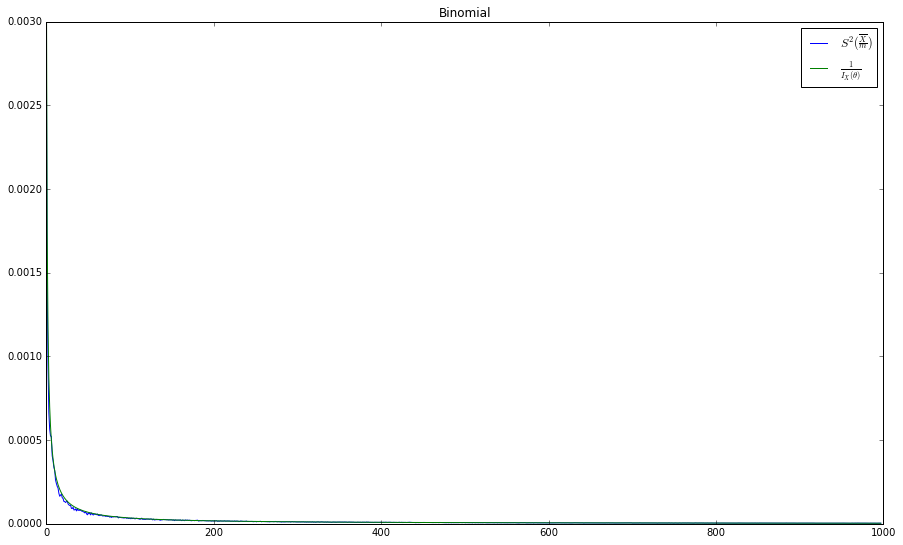

In [31]:
plt.figure(figsize=(15, 9))
plt.plot([getDispersionBootstrapEstimationForBin(n) for n in range(1, N-1)], label=r'$S^{2}(\frac{\overline{X}}{m})$')
plt.plot([getFisherInfoForBin(n, 50, binTheta) for n in range(1, N-1)], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.title(r'Binomial')
plt.ylim(0, 0.003)
plt.legend(loc='best')
plt.show()

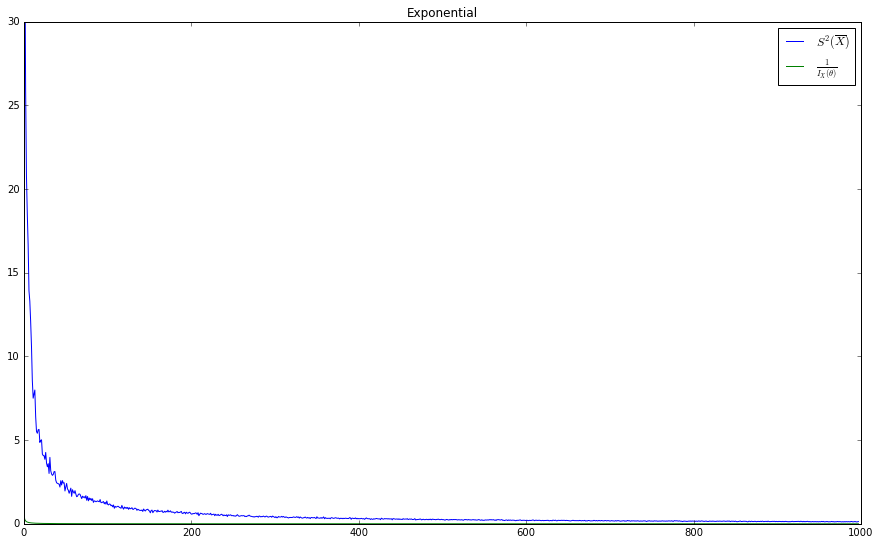

In [32]:
plt.figure(figsize=(15, 9))
plt.title(r'Exponential')
plt.plot([getDispersionBooststrapEstimationForExp(n) for n in range(1, N-1)], label=r'$S^{2}(\overline{X})$')
plt.plot([getFisherInfoForExp(dispersionTheta, n) for n in range(1, N-1)], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.legend(loc='best')
plt.ylim(0, 30)
plt.show()


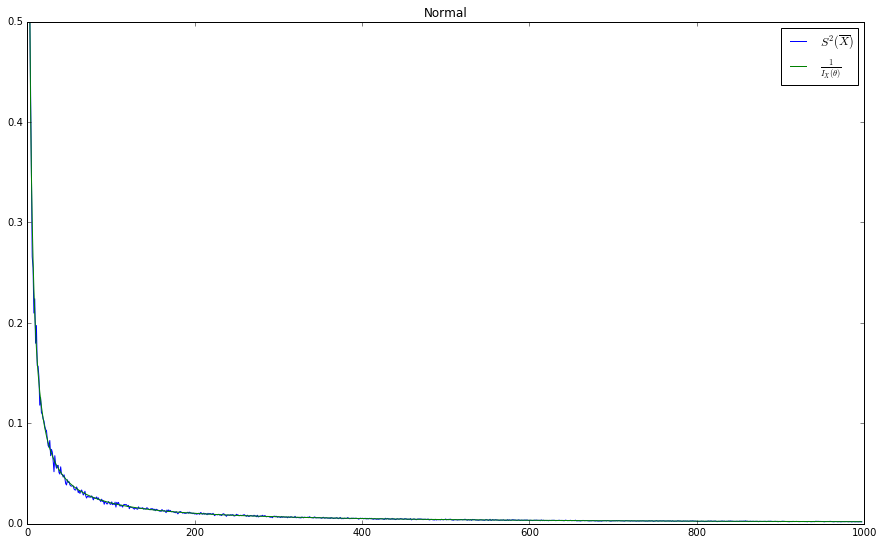

In [33]:
plt.figure(figsize=(15, 9))
plt.title(r'Normal')
plt.plot([getDispersionBoostsrapEstimationForNormal(n) for n in range(1, N-1)], label=r'$S^{2}(\overline{X})$')
plt.plot([getFisherInfoForNormal(2.1, n) for n in range(1, N-1)], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.legend(loc='best')
plt.ylim(0, 0.5)
plt.show()

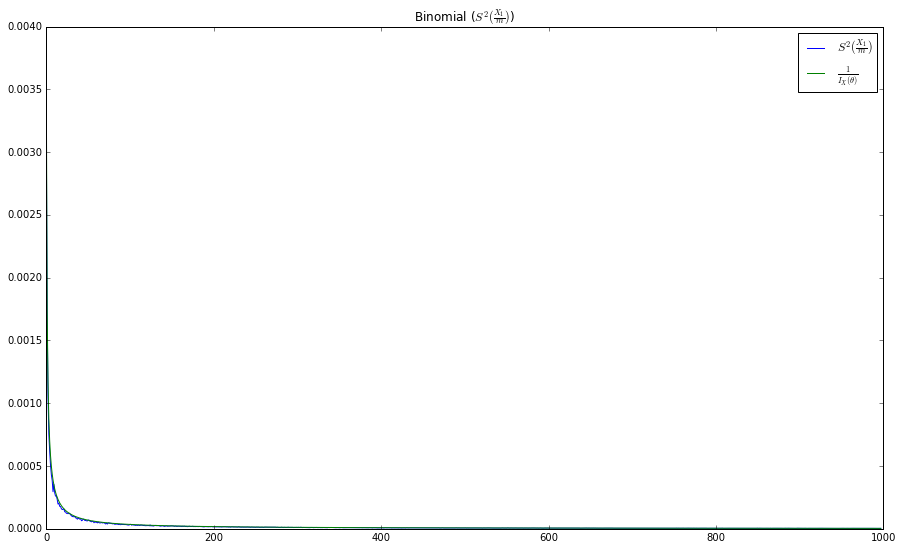

In [34]:
plt.figure(figsize=(15, 9))
plt.plot([getDispersionBootstrapEstimationForBin2(n) for n in range(1, N-1)], label=r'$S^{2}(\frac{X_1}{m})$')
plt.plot([getFisherInfoForBin(n, 50, binTheta) for n in range(1, N-1)], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.title(r'Binomial ($S^{2}(\frac{X_1}{m})$)')
plt.legend(loc='best')
plt.show()

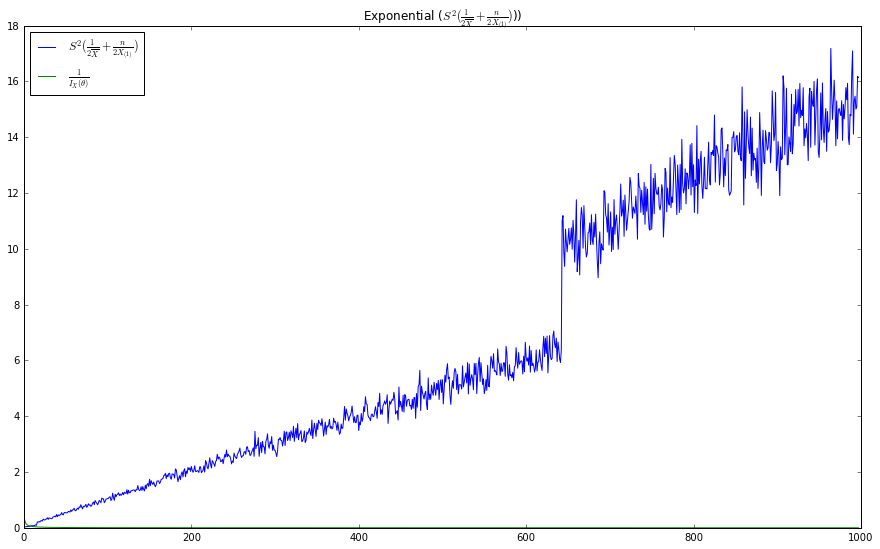

In [35]:
plt.figure(figsize=(15, 9))
plt.plot([getDispersionBooststrapEstimationForExp2(n) for n in range(1, N-1)], label=r'$S^{2}(\frac{1}{2\overline{X}} + \frac{n}{2X_{(1)}})$')
plt.plot([getFisherInfoForExp(dispersionTheta, n) for n in range(1, N-1)], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.title(r'Exponential ($S^{2}(\frac{1}{2\overline{X}} + \frac{n}{2X_{(1)}})$))')
plt.legend(loc='best')
plt.show()

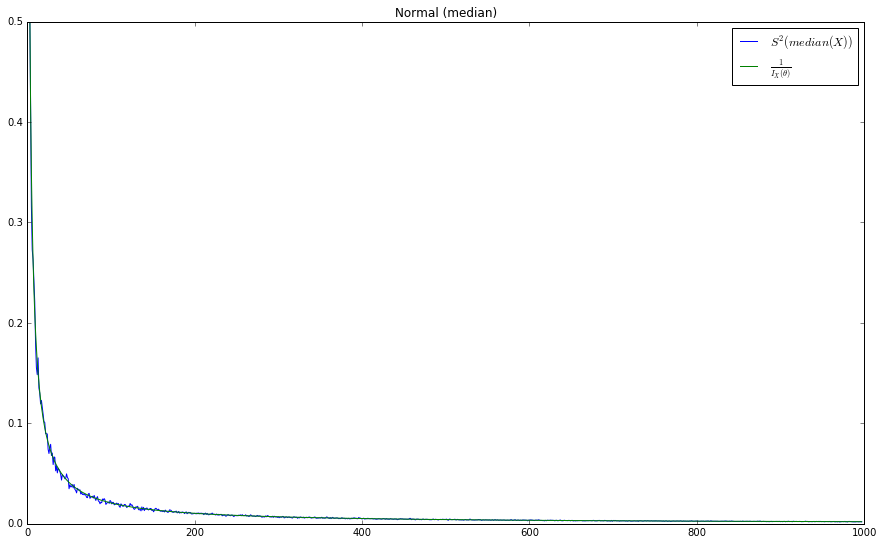

In [36]:
plt.figure(figsize=(15, 9))
plt.title(r'Normal (median)')
plt.plot([getDispersionBoostsrapEstimationForNormal2(n) for n in range(1, N-1)], label=r'$S^{2}(median(X))$')
plt.plot([getFisherInfoForNormal(2.1, n) for n in range(1, N-1)], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.legend(loc='best')
plt.ylim(0, 0.5)
plt.show()